# A reta de mínimos quadrados

## $ \S 1 $ Descrição da reta de mínimos quadrados

Considere um conjunto de dados $ (x_0, y_0), \dots, (x_M, y_M) $. Se suspeitamos que possa haver uma relação aproximadamente linear entre as variáveis $ x $ e $ y $ representadas por eles, é natural tentar ajustar um polinômio 
$$
y = f(x) = ax + b
$$
de grau $ \le 1 $ aos dados.

O **resíduo**
$$
r_i= y_i - f(x_i) \qquad (i = 0, 1, \cdots, M)
$$
mede a discrepância entre o $ i $-ésimo dado e o valor ajustado correspondente. Seguindo o critério do método dos mínimos quadrados, a função $ f $ deste tipo que melhor se ajusta é aquela que minimiza a soma dos quadrados dos resíduos. Portanto  devemos minimizar
$$
    S(a,b) = \sum_{i=0}^M r_i^2 = \sum_{i=0}^M \big[y_i - (a x_i + b)\big]^2\,.
$$

Os pontos críticos de $ S $ são os pares $ (a, b) $ tais que:
$$
\begin{cases}
\displaystyle{\frac{\partial S}{\partial a}(a, b)} &= \displaystyle{-2\sum_{i=0}^M x_i\,\big[y_i - (a x_i + b)\big]} &=& 0 \\
\displaystyle{\frac{\partial S}{\partial b}(a, b)} &= \displaystyle{-2\sum_{i=0}^M \big[y_i - (a x_i + b)\big]} &=& 0
\end{cases}
$$
ou equivalentemente
\begin{equation*}\label{E:system}
\boxed{
\begin{cases}
\displaystyle{\Bigg(\sum_{i=0}^M x_i^2}\Bigg)\,a &+& \displaystyle{\Bigg(\sum_{i=0}^Mx_i\Bigg)\,b}  &=& \displaystyle{\sum_{i=0}^M x_iy_i} \\
\displaystyle{\Bigg(\sum_{i=0}^M x_i}\Bigg)\,a &+& \displaystyle{(M+1)\,b}  &=& \displaystyle{\sum_{i=0}^M y_i}
\end{cases}}\tag{1}
\end{equation*}

Provaremos na $ \S 3 $ que *este sistema tem uma única solução desde que os $ x_i $* não *sejam todos iguais; além disto, a solução $ (\hat a, \hat b) $ é de fato o ponto de mínimo global de* $ S $. A reta de equação
$$
y = \hat ax + \hat b 
$$
é chamada de **reta de mínimos quadrados** ou **reta de regressão** associada aos dados.
A dispersão deles ao redor desta reta é quantificada pelo **desvio padrão**
$ \sigma $, definido neste contexto por:
$$
\boxed{\sigma = \sqrt{\frac{S(\hat a,\hat b)}{M - 1}} = \sqrt{\frac{\sum_{i=0}^M \big[y_i - (\hat ax_i + \hat b)\big]^2}{M - 1}}}
$$

📝 Ao contrário de $ S(\hat a, \hat b) $, o desvio padrão $ \sigma $ é expresso *na mesma unidade de medida* que a dos $ y_i $. Quanto menor o valor de $ \sigma $, melhor é a concordância entre os dados e a reta de mínimos quadrados. Apesar de não discutirmos este tópico aqui, ele é importante para a análise estatística dos dados.

**Exemplo 1:** Encontre a reta de mínimos quadrados para os dados abaixo:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 1 $   | $ 0 $   |
| $ 2 $   | $ 2 $   |
| $ 3 $   | $ 2 $   |
| $ 4 $   | $ 5 $   |
| $ 5 $   | $ 4 $   |

**Solução:** Primeiro estendemos a tabela com duas colunas contendo os valores de $ x_i^2 $ e $ x_i y_i $ para cada $ i = 0, \dots, 4 $, e também uma nova linha em que são computadas as somas correspondentes a cada coluna:

| $ x_i $ | $ y_i $ | $ x_i^2 $ | $ x_iy_i $ |
|---------|---------|-----------|------------|
| $ 1 $   | $ 0 $   | $ 1 $     | $ 0 $      |
| $ 2 $   | $ 2 $   | $ 4 $     |  $ 4 $     |
| $ 3 $   | $ 2 $   | $ 9 $     | $ 6 $      |
| $ 4 $   | $ 5 $   | $ 16 $    | $ 20 $     |
| $ 5 $   | $ 4 $   | $ 25 $    | $ 20 $     |
|         |         |           |            |
| $ \mathbf{15} $  | $ \mathbf{13} $  | $ \mathbf{55} $    | $ \mathbf{50} $     |


Como indicado na última linha da tabela,
$$
\sum_{i=0}^{4} x_i = 15\,,\quad
\sum_{i=0}^{4} y_i = 13\,,\quad
\sum_{i=0}^{4} x_i^2 = 55\,,\quad
\sum_{i=0}^{4} x_iy_i = 50\,.
$$
Logo neste caso o sistema \eqref{E:system} é:
\begin{equation*}
\begin{cases}
55 a &+& 15 b & & = 50 \\
15 a &+&  5b & & = 13
\end{cases}
\end{equation*}
Agora calcula-se facilmente que a solução é $ \hat a = \frac{11}{10} $ e $ \hat b = \frac{-7}{10} $ e que o desvio padrão é $ \sigma = 1.0165 $. (Verifique!)

## $ \S 2 $ Implementação de procedimentos para encontrar e exibir a reta de mínimos quadrados

Com ajuda do computador, podemos automatizar a determinação e solução do sistema \eqref{E:system}.

📝 Como nosso foco aqui não é a resolução em si, mas sim o método dos mínimos quadrados, utilizaremos o procedimento `solve` da biblioteca `numpy.linalg` para resolver \eqref{E:system}.

In [3]:
def reta_minimos_quadrados(xs, ys):
    """
    Encontra os coeficientes a e b da reta de mínimos quadrados para
    um conjunto de dados (x_i, y_i) e o desvio padrão correspondente.
    Entradas:
        * Duas listas ou arrays xs e ys de mesmo comprimento,
          com pelo menos dois elementos distintos em xs.
    Saída:
        * Os coeficientes a e b da reta y = a * x + b de mínimos
          quadrados.
        * O desvio padrão associado.
    """
    import numpy as np
    

    assert len(xs) == len(ys)
    # Verifique se há pelo menos dois x_i distintos:
    assert len(set(xs)) > 1
        
    M = len(xs) - 1
    xs = np.array(xs)
    ys = np.array(ys)
    xs_xs = xs * xs
    xs_ys = xs * ys
    
    # Monte a matriz A dos coeficientes e vetor c do lado direito:
    A = np.zeros((2, 2))
    c = np.zeros(2)
    A[0][0] = np.sum(xs_xs)
    A[0][1] = A[1][0] = sum(xs)
    A[1][1] = M + 1
    c[0] = np.sum(xs_ys)
    c[1] = np.sum(ys)
    
    solucao = np.linalg.solve(A, c)
    a = solucao[0]
    b = solucao[1]
    
    # Calcule o desvio padrão:
    sigma = 0
    for i in range(M + 1):
        sigma += (ys[i] - (a * xs[i] + b))**2
    sigma = np.sqrt(sigma / (M - 1))
    
    return a, b, sigma

In [4]:
def exibe_pontos_e_reta(xs, ys, a, b):
    """
    Exibe um conjunto de pontos (x_i, y_i) e a reta de eq. y = a * x + b.
    Entradas:
        * Duas listas xs e ys de mesmo comprimento.
        * Dois números a e b.
    Saída: nenhuma.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    assert len(xs) == len(ys)
    x_min = min(xs)
    x_max = max(xs)
    # Para o gráfico não ficar apertado, introduzimos uma "folga":
    folga = (x_max - x_min) / 10
    xs_reta = np.linspace(x_min - folga, x_max + folga, num=201)
    ys_reta = np.array([a * x + b for x in xs_reta]) 
    
    plt.plot(xs, ys, 'o')
    plt.plot(xs_reta, ys_reta, '-')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(("Dados", "Reta de mínimos quadrados"), loc=0)
    plt.show()
    
    return None

**Exemplo 1 (continuação):** Voltando ao exemplo 1, podemos verificar nossa solução obtida "à mão" usando a implementação acima, além de exibir os dados e a reta de mínimos quadrados.

A reta de mínimos quadrados é descrita pela equação y = 1.1 x + -0.7 .
O desvio padrão associado é 1.0165 .


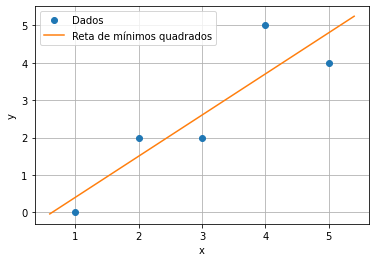

In [5]:
xs = [1, 2, 3, 4, 5]
ys = [0, 2, 2, 5, 4]
a, b, sigma = reta_minimos_quadrados(xs, ys)
a = round(a, 4)
b = round(b, 4)
sigma = round(sigma, 4)
print(f"A reta de mínimos quadrados é descrita pela equação y = {a} x + {b} .")
print(f"O desvio padrão associado é {sigma} .")
exibe_pontos_e_reta(xs, ys, a, b)

## $ \S 3 $ Existência e unicidade da reta de mínimos quadrados

**Teorema 3.1:** *Dados $ (x_0,y_0)\,,\,(x_1,y_1)\,,\cdots,\,(x_M,y_M)\, $, existe uma única reta de mínimos quadrados adaptada a estes pontos desde que existam $ i $ e $ j $ com $ x_i \ne x_j $.*

**Prova:** Considere o sistema que define a reta de mínimos quadrados:
\begin{equation*}\label{E:system2}
\begin{cases}
\displaystyle{\Bigg(\sum_{i=0}^M x_i^2}\Bigg)\,a &+& \displaystyle{\Bigg(\sum_{i=0}^Mx_i\Bigg)\,b}  &=& \displaystyle{\sum_{i=0}^M x_iy_i} \\
\displaystyle{\Bigg(\sum_{i=0}^M x_i}\Bigg)\,a &+& \displaystyle{(M+1)\,b}  &=& \displaystyle{\sum_{i=0}^M y_i}
\end{cases} \tag{2}
\end{equation*}

Sejam $ \mathbf C $ a matriz dos coeficientes deste sistema, $ \mathbf x = (x_0,x_1,\cdots,x_M) $ e $ \mathbf u = (1,1,\cdots,1) \in \mathbb R^{M+1} $. Então
$$
\det(\mathbf C) = (M+1) \sum_{i=0}^{M} x_i^2 - \Bigg( \sum_{i=0}^M x_i \Bigg)^2 = \left\Vert \mathbf u \right \Vert^2\left\Vert \mathbf x \right \Vert^2 - (\mathbf u \cdot \mathbf x)^2\,,
$$
onde $ \Vert{\cdot}\Vert $ denota a norma euclidiana em $ \mathbb R^{M+1} $. Pela desigualdade de Cauchy-Schwarz,
$$
(\mathbf u \cdot \mathbf x)^2 \le \left\Vert \mathbf u \right \Vert^2\left\Vert \mathbf x \right \Vert^2 ,
$$
com igualdade se e somente se $ \mathbf x $ é um múltiplo de $ \mathbf u $, ou seja, se e somente se todos os $ x_i $ são iguais. Como esta possibilidade foi excluída por hipótese, concluímos que $ \det(\mathbf C) > 0 $. Logo o sistema \eqref{E:system2} tem uma solução e esta solução é única. Isto significa que a função $ S $ tem exatamente um ponto crítico. Este é de fato o mínimo global de $ S $ em $ \mathbb R^2 $ porque
\begin{equation*}\label{E:limit}
\lim_{\Vert{(a,b)}\Vert \to \infty} S(a,b) = +\infty\,. \tag{3}
\end{equation*}

⚡ **Problema 1:** A validade de \eqref{E:limit} foi afirmada mas não justificada. O objetivo deste problema é mostrar que o único ponto crítico de $ S $ é de fato o mínimo global. (Mais tarde daremos outra demonstração, completamente diferente.)

(a) Verifique que a Hessiana de $ S $ é dada por
$$
\textrm{hess}\,S = 
\begin{bmatrix}
\displaystyle{\frac{\partial^2 S}{\partial a^2}} & \displaystyle{\frac{\partial^2 S}{\partial b \partial a}} \\
\displaystyle{\frac{\partial^2 S}{\partial a \partial b}} & \displaystyle{\frac{\partial^2 S}{\partial b^2}}
\end{bmatrix}
=2
\begin{bmatrix}
\displaystyle{\sum_{i=0}^{M} x_i^2} & \displaystyle{\sum_{i=0}^{M} x_i} \\
\displaystyle{\sum_{i=0}^{M} x_i} & \displaystyle{(M+1)}
\end{bmatrix}\ .
$$

(b) Usando os vetores $ \mathbf x,\, \mathbf u \in \mathbb R^{M+1} $ introduzidos na demonstração, mostre que seu determinante vale
$$
\big\vert\textrm{hess}\,S\big\vert = 4\,\left\Vert \mathbf u \right \Vert^2 \left\Vert \mathbf x \right \Vert^2 - 4\,(\mathbf x \cdot \mathbf u)^2 > 0
$$
e que $ \frac{\partial^2 S}{\partial a^2} > 0 $ para qualquer ponto $ (a, b) $.

(c) Conclua pelo teste da segunda derivada que o único ponto crítico $ (\hat a, \hat b) $ de $ S $ é um ponto de *mínimo local*. Contudo, isto ainda não implica por si só que este ponto seja de mínimo *global*.

(d) Mostre que restringindo-se o domínio de $ S $ à reta pela origem de equação $ b = \lambda a $ ($ \lambda $ constante), obtemos uma função quadrática $ S_\lambda(a) $ da forma:
$$
S_\lambda(a) = \alpha\, a^2 + \beta\, a + \gamma
$$
onde as constantes dependem de $ \lambda $, mas sempre vale $ \alpha > 0 $. Ou seja, seus gráficos são parábolas com concavidade para cima.

(e) Como $ (\hat a, \hat b) $ é mínimo local de $ S $, $ \hat a $ é mínimo local de cada $ S_\lambda $. Logo ele corresponde ao vértice de cada parábola, e na verdade é o mínimo global comum a todas as restrições. Analogamente para a restrição de $ S $ à reta de equação $ a = 0 $ como função de $ b $. Portanto $ (\hat a, \hat b) $ é mínimo global de $ S $.

## $ \S 4 $ O coeficiente de correlação de Pearson

O __coeficiente de correlação de Pearson__ (universalmente denotado por $ r $)
quantifica a existência e a intensidade da correlação _linear_ entre duas
variáveis $ x $ e $ y $. Ele é sempre um número entre $ -1 $ e $ 1 $.
* Se $ y $ é uma função linear de $ x $, digamos $ y = ax + b $, então $ r = \pm 1 $
  de acordo com o sinal de $ a $. Em outras palavras, uma correlação linear perfeita
  corresponde a $ r = \pm 1 $: se uma variável aumenta, a outra aumenta ou diminui
  numa proporção fixa.
* Se $ y $ e $ x $ são completamente independentes (intuitivamente, ortogonais),
  então $ r = 0 $.

__Exemplo:__ Se $ c_i $ e $ p_i $ representam as alturas de pessoas numa determinada
população, medidas em centímetros e em polegadas, respectivamente, então $ r = 1
$. Se $ x_i $ representa a precipitação pluvial em Tóquio no $ i $-ésimo dia do
ano e $ y_i $ o número de carros usados vendidos no Brasil no mesmo dia, então é
de se esperar que $ r $ esteja muito próximo de $ 0 $.

O coeficiente $ r $ está intimamente relacionado à reta de mínimos quadrados.
Mais precisamente, se traçarmos um gráfico de dispersão dos pontos de dados e
ajustarmos a reta de mínimos quadrados, o coeficiente de correlação de Pearson
mede quão bem ela se ajusta aos dados. De maneira resumida, se $ \vert r \vert $
está próximo de $ 1 $ (resp. $ 0 $), isto indica um bom (resp. mal) ajuste.

⚠️ Dados pontos $ (x_i, y_i) $, o coeficiente de correlação de Pearson
correspondente não deve ser confundido com a _inclinação_ da reta de mínimos
quadrados associada a eles.

![Coeficiente de correlação de Pearson 1.0](fig_5-4_exemplo_1.png)
![Coeficiente de correlação de Pearson 0.4](fig_5-4_exemplo_2.png)
![Coeficiente de correlação de Pearson 0.0](fig_5-4_exemplo_3.png)
![Coeficiente de correlação de Pearson -0.9](fig_5-4_exemplo_4.png)

__Algoritmo:__ Para calcular o coeficiente de correlação de Pearson:

1. Calcule a média aritmética dos valores de $ x $ e $ y $:
   $$ \bar{x} = \frac{1}{M + 1} \sum_{i=0}^{M} x_i \quad \text{e} \quad
   \bar{y} = \frac{1}{M + 1} \sum_{i=0}^{M} y_i \,. $$
2. Subtraia a média de cada elemento para centralizar os dados, i .e., defina
   $ x'_i = x_i - \bar{x} $ e $ y'_i = y_i - \bar{y} $ para cada $ i $. Em
   seguida monte os vetores $ \mathbf x' = (x_i') $ e $ \mathbf y' = (y_i') $ em
   $ \mathbb R^{M + 1} $ correspondentes.
3. Normalize estes últimos vetores (i.e., divida cada um pela respectiva norma
   euclidiana) para obter vetores unitários $ \mathbf u $ e $ \mathbf v $.
4. O coeficiente de correlação de Pearson é dado por
   $ r = \mathbf u \cdot \mathbf v $, o produto interno de $ \mathbf u $ e
   $ \mathbf v $ (ou, equivalentemente, pelo cosseno do ângulo entre eles).

__Exemplo:__ Suponha que um investidor esteja interessado em quantificar a
correlação entre o preço de uma ação e o tamanho dos dividendos pagos pela
empresa.  Para isto, ele coleta os dados do preço da ação ($ x $) e o dividendo
anual pago por ação ($ y $) ao longo de um período. Usando o coeficiente de
correlação de Pearson, pode-se descobrir se há uma relação linear forte entre
ambas quantidades.

In [1]:
import numpy as np


def pearson_coefficient(xs: list[float], ys: list[float]) -> float:
    """
    Calculates the Pearson coefficient between two sets of data.
    Parameters:
        * xs, ys: Two lists of numbers of equal length representing the
                  data sets.
    Returns:
        * r: The Pearson coefficient between the data sets xs and ys.
    An error is raised if the lists have different lengths.
    """
    if len(xs) != len(ys):
        raise ValueError("The lists xs and ys must have the same length.")

    xs, ys = np.array(xs), np.array(ys)
    mean_xs, mean_ys = np.mean(xs), np.mean(ys)    # Arithmetic means.
    diff_xs, diff_ys = xs - mean_xs, ys - mean_ys
    r = np.sum(diff_xs * diff_ys) / np.sqrt(np.sum(diff_xs**2) * np.sum(diff_ys**2))

    return r

## $ \S 5 $ Problemas

**Problema 2:** Usando o método dos mínimos quadrados, adapte uma reta aos dados tabelados abaixo:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ -3 $  | $ 3 $  |
| $ -2 $  |  $ 2 $  |
| $ -1 $  | $ 2 $   |
| $ 0 $   |  $ 1 $  |
| $ 1 $   |  $ 0 $  |
| $ 2 $   |  $ 0 $  |
| $ 3 $   |  $ -1 $  |

(a) Sem usar o computador. *Dica:* Utilize a mesma estratégia que no Exemplo 1; comece estendendo a tabela.

(b) Usando o computador. Calcule também o desvio padrão e o coeficiente de correlação de Pearson.

*Solução:*

__Problema 3:__ Repita o problema anterior para os dados seguintes:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 1 $  | $ 0 $  |
| $ 2 $  | $ 1 $  |
| $ 3 $  | $ 4 $   |
| $ 4 $   |  $ 9 $  |
| $ 5 $   |  $ 16 $  |
| $ 6 $   |  $ 25 $  |

*Solução:*

**Problema 4:** Ajuste uma reta aos dados abaixo e calcule o desvio padrão:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 2.5 $  | $ 1.7 $  |
| $ 1.7 $  | $ 1.4 $  |
| $ 3.2 $  | $ 2.5 $  |
| $ 0.7 $  | $ 0.6 $  |
| $ 0.3 $  | $ 0.1 $  |

*Solução:*

**Problema 5:** A tabela seguinte contém a altura e peso de vinte indivíduos.

| altura (em polegadas) | peso (em libras) |
|:---------------------:|:----------------:|
| $ 67.0 $              | $ 175.9 $        |
| $ 63.4 $              | $ 156.3 $        |
| $ 71.1 $              | $ 186.6 $        |
| $ 71.6 $              | $ 213.7 $        |
| $ 64.7 $              | $ 167.1 $        |
| $ 69.2 $              | $ 189.4 $        |
| $ 69.2 $              | $ 186.4 $        |
| $ 67.6 $              | $ 172.1 $        |
| $ 72.4 $              | $ 196.0 $        |
| $ 63.9 $              | $ 172.8 $        |
| $ 69.6 $              | $ 185.9 $        |
| $ 67.9 $              | $ 182.4 $        |
| $ 67.9 $              | $ 174.1 $        |
| $ 69.4 $              | $ 197.7 $        |
| $ 66.1 $              | $ 149.1 $        |
| $ 75.2 $              | $ 228.7 $        |
| $ 67.8 $              | $ 162.0 $        |
| $ 68.1 $              | $ 192.3 $        |
| $ 69.0 $              | $ 184.4 $        |
| $ 72.8 $              | $ 206.8 $        |

(a) Plote os pontos $ (h_i, p_i) $ onde $ h_i $ é a altura e $ p_i $ o peso do $ i $-ésimo indivíduo.

(b) Encontre a função da forma $ \text{peso} = a \cdot \text{altura} + b $ que melhor se ajusta a estes dados, e exiba seu gráfico juntamente com os dados.

(c) Determine o desvio padrão em kg ($ 1 $ libra equivale a aproximadamente $ 0.4536 $ kg).

(d) Estime o peso em kg de uma pessoa de altura igual a $ 71.3 $ polegadas.

(e) Estime a altura em metros de uma pessoa que pesa $ 158.3 $ libras.

(f) Calcule o coeficiente de correlação $ r $ entre a altura e o peso nesta amostra.

*Solução:*

In [16]:
alturas = [67.0, 63.4, 71.1, 71.6, 64.7,
           69.3, 69.2, 67.6, 72.4, 63.9,
           69.6, 67.9, 67.9, 69.4, 66.1,
           75.2, 67.8, 68.1, 69.0, 72.8]

pesos = [175.9, 156.3, 186.6, 213.7, 167.1,
         189.4, 186.4, 172.1, 196.0, 172.8,
         185.9, 182.4, 174.1, 197.7, 149.1,
         228.7, 162.0, 192.3, 184.4, 206.8]

**Problema 6:** A tabela seguinte fornece a população aproximada da Alemanha no período de $ 1816 $ a $ 1939 $.

| anos | habitantes (mi.) |
|:---:|:----------------------:|
| $ 1816 $ | $ 22.38 $ |
| $ 1828 $ | $ 26.65 $ |
| $ 1834 $ | $ 28.24 $ |
| $ 1840 $ | $ 30.38 $ |
| $ 1852 $ | $ 33.41 $ |
| $ 1861 $ | $ 35.57 $ |
| $ 1864 $ | $ 37.80 $ |
| $ 1871 $ | $ 41.06 $ |
| $ 1880 $ | $ 45.23 $ |
| $ 1890 $ | $ 49.43 $ |
| $ 1900 $ | $ 56.37 $ |
| $ 1910 $ | $ 64.93 $ |
| $ 1925 $ | $ 63.18 $ |
| $ 1933 $ | $ 66.03 $ |
| $ 1939 $ | $ 69.46 $ |

(a) Plote o par (ano, população) para cada linha fornecida.

(b) Verifique que parece existir uma relação aproximadamente linear entre o ano e a população. Encontre $ a $ e $ b $ de modo que a função:
$$
\text{população}  = a \,\text{ano} + b
$$
se ajuste aos dados da melhor maneira possível e determine o desvio padrão associado.

(c) Estime a população da Alemanha no ano de $ 1800 $ a partir dos dados.

(d) Encontre o ano e mês em que a população da Alemanha superou $ 60 $ milhões de habitantes.

*Solução:*

In [3]:
anos = [1816, 1828, 1834, 1840, 1852,
        1861, 1864, 1871, 1880, 1890,
        1900, 1910, 1925, 1933, 1939]

populacao = [22.38, 26.65, 28.24, 30.38, 33.41,
             35.57, 37.80, 41.06, 45.23, 49.43,
             56.37, 64.93, 63.18, 66.03, 69.46]

**Problema 7:** A tabela abaixo indica a concentração de gás carbônico ($\textrm{CO}_2 $) em partes por milhão na atmosfera da Terra num período de 21 anos ([fonte](https://www.co2levels.org/)).

| Ano (2002 a 2022) | $\textrm{CO}_2$ (em PPM) |
|:-----------------:|:---------------:|
|      $ 2002 $     |    $ 375.66 $   |
|      $ 2003 $     |    $ 378.29 $   |
|      $ 2004 $     |    $ 381.04 $   |
|      $ 2005 $     |    $ 382.58 $   |
|      $ 2006 $     |    $ 384.62 $   |
|      $ 2007 $     |    $ 386.98 $   |
|      $ 2008 $     |    $ 388.48 $   |
|      $ 2009 $     |    $ 390.46 $   |
|      $ 2010 $     |    $ 393.02 $   |
|      $ 2011 $     |    $ 395.12 $   |
|      $ 2012 $     |    $ 397.28 $   |
|      $ 2013 $     |    $ 400.22 $   |
|      $ 2014 $     |    $ 402.13 $   |
|      $ 2015 $     |    $ 404.31 $   |
|      $ 2016 $     |    $ 408.56 $   |
|      $ 2017 $     |    $ 410.03 $   |
|      $ 2018 $     |    $ 412.45 $   |
|      $ 2019 $     |    $ 414.28 $   |
|      $ 2020 $     |    $ 417.69 $   |
|      $ 2021 $     |    $ 419.90 $   |
|      $ 2022 $     |    $ 421.45 $   |

(a) Encontre as constantes $ a,\,b \in \mathbb R $ de modo que a equação
$$
\text{concentração de $ \text{CO}_2 $} = a\, \text{ano} + b
$$
se ajuste o melhor possível aos dados.

(b) Estime o aumento anual na concentração de gás carbônico.

(c) Preveja a concentração atmosférica de $\text{CO}_2$ no ano de $ 2030 $.

(d) Calcule o coeficiente de correlação $ r $ de Pearson.

*Solução:*

In [19]:
anos = range(2002, 2023)
concentracoes = [375.66, 378.29, 381.04, 382.58, 384.62, 
                 386.98, 388.48, 390.46, 393.02, 395.12,
                 397.28, 400.22, 402.13, 404.31, 408.56,
                 410.03, 412.45, 414.28, 417.69, 419.90,
                 421.45]